# U Food Marketing Analysis

In [811]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [812]:
food = pd.read_csv(r'C:\Users\Uer\Desktop\pandas project/u_food_marketing.csv')

In [813]:
food.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,1,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,1,0,0,0,0,0,0,0,1,407,392,0


In [814]:
pd.set_option('display.max.columns' , 50)
pd.set_option('display.max.rows' , 2300 )

In [815]:
food[food.duplicated].sum()   # looking for duplicates 

Income                  9366769.0
Kidhome                      79.0
Teenhome                     87.0
Recency                    9277.0
MntWines                  55672.0
MntFruits                  4936.0
MntMeatProducts           28906.0
MntFishProducts            7256.0
MntSweetProducts           4708.0
MntGoldProds               8380.0
NumDealsPurchases           403.0
NumWebPurchases             725.0
NumCatalogPurchases         488.0
NumStorePurchases          1104.0
NumWebVisitsMonth           975.0
AcceptedCmp3                 12.0
AcceptedCmp4                  9.0
AcceptedCmp5                 15.0
AcceptedCmp1                  9.0
AcceptedCmp2                  4.0
Complain                      1.0
Z_CostContact               552.0
Z_Revenue                  2024.0
Response                     22.0
Age                        9358.0
Customer_Days            464574.0
marital_Divorced             16.0
marital_Married              69.0
marital_Single               34.0
marital_Togeth

In [816]:
food.drop_duplicates(keep = False , inplace = True)  # Removing duplicates 

In [817]:
food.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1843 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                1843 non-null   float64
 1   Kidhome               1843 non-null   int64  
 2   Teenhome              1843 non-null   int64  
 3   Recency               1843 non-null   int64  
 4   MntWines              1843 non-null   int64  
 5   MntFruits             1843 non-null   int64  
 6   MntMeatProducts       1843 non-null   int64  
 7   MntFishProducts       1843 non-null   int64  
 8   MntSweetProducts      1843 non-null   int64  
 9   MntGoldProds          1843 non-null   int64  
 10  NumDealsPurchases     1843 non-null   int64  
 11  NumWebPurchases       1843 non-null   int64  
 12  NumCatalogPurchases   1843 non-null   int64  
 13  NumStorePurchases     1843 non-null   int64  
 14  NumWebVisitsMonth     1843 non-null   int64  
 15  AcceptedCmp3          1843

In [818]:
food['Total_children'] = food[['Kidhome', 'Teenhome']].sum(axis = 1)  # joining two sametype columns together horizontally thats why written axis =1 

In [819]:
food['marital_Divorced'] = food['marital_Divorced'].replace({1:5,0:0})   # to join all together in one column we have to change its numbers 
food['marital_Married'] = food['marital_Married'].replace({1:4,0:0})
food['marital_Single'] = food['marital_Single'].replace({1:3,0:0})
food['marital_Together'] = food['marital_Together'].replace({1:2,0:0})
food['marital_Widow'] = food['marital_Widow'].replace({1:1,0:0})

In [820]:
food['Marital_Status'] = food[['marital_Divorced' , 'marital_Married' , 'marital_Single' , 'marital_Together' , 'marital_Widow']].sum(axis = 1)  # Added all columns together in one column

In [821]:
food[food['Marital_Status'] != 0].head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Total_children,Marital_Status
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,3,0,0,0,0,1,0,0,1529,1441,0,0,3
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,3,0,0,0,0,1,0,0,21,15,0,2,3
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,2,0,0,0,1,0,0,734,692,0,0,2
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,2,0,0,0,1,0,0,48,43,0,1,2
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,4,0,0,0,0,0,0,0,1,407,392,0,1,4


In [822]:
food['Marital_Status_Str'] = food['Marital_Status'].map({5 : 'Divorced' , 4 : 'Married' , 3 : 'Single' , 2 : 'Together' , 1 : 'Widow'})  

In [823]:
food.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1843 entries, 0 to 2204
Data columns (total 42 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                1843 non-null   float64
 1   Kidhome               1843 non-null   int64  
 2   Teenhome              1843 non-null   int64  
 3   Recency               1843 non-null   int64  
 4   MntWines              1843 non-null   int64  
 5   MntFruits             1843 non-null   int64  
 6   MntMeatProducts       1843 non-null   int64  
 7   MntFishProducts       1843 non-null   int64  
 8   MntSweetProducts      1843 non-null   int64  
 9   MntGoldProds          1843 non-null   int64  
 10  NumDealsPurchases     1843 non-null   int64  
 11  NumWebPurchases       1843 non-null   int64  
 12  NumCatalogPurchases   1843 non-null   int64  
 13  NumStorePurchases     1843 non-null   int64  
 14  NumWebVisitsMonth     1843 non-null   int64  
 15  AcceptedCmp3          1843

In [824]:
food['education_2n Cycle'] = food['education_2n Cycle'].replace({1:1,0:0})   
food['education_Basic'] = food['education_Basic'].replace({1:2,0:0})
food['education_Graduation'] = food['education_Graduation'].replace({1:3,0:0})
food['education_Master'] = food['education_Master'].replace({1:4,0:0})
food['education_PhD'] = food['education_PhD'].replace({1:5,0:0})

In [825]:
food['Education_Status'] = food[['education_2n Cycle' , 'education_Basic' , 'education_Graduation' , 'education_Master' ,'education_PhD']].sum(axis = 1)

In [826]:
food[food['Education_Status'] != 0].head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Total_children,Marital_Status,Marital_Status_Str,Education_Status
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,3,0,0,0,0,3,0,0,1529,1441,0,0,3,Single,3
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,3,0,0,0,0,3,0,0,21,15,0,2,3,Single,3
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,2,0,0,0,3,0,0,734,692,0,0,2,Together,3
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,2,0,0,0,3,0,0,48,43,0,1,2,Together,3
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,4,0,0,0,0,0,0,0,5,407,392,0,1,4,Married,5


In [827]:
food['Accepted_Campaigns'] = food[['AcceptedCmp3' , 'AcceptedCmp4' , 'AcceptedCmp5' , 'AcceptedCmp1' ,'AcceptedCmp2', 'Response' ]].sum(axis = 1)

In [828]:
food[food['Accepted_Campaigns'] != 0].head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Total_children,Marital_Status,Marital_Status_Str,Education_Status,Accepted_Campaigns
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,3,0,0,0,0,3,0,0,1529,1441,0,0,3,Single,3,1
8,30351.0,1,0,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1,46,2547,0,0,0,2,0,0,0,0,0,5,44,42,0,1,2,Together,5,1
9,5648.0,1,1,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0,70,2267,0,0,0,2,0,0,0,0,0,5,36,23,1,2,2,Together,5,1
17,76995.0,0,1,91,1012,80,498,0,16,176,2,11,4,9,5,0,0,0,1,0,0,3,11,0,71,2617,0,4,0,0,0,0,0,0,4,0,1606,1430,1,1,4,Married,4,1
21,58607.0,0,1,63,867,0,86,0,0,19,3,2,3,9,8,0,1,0,0,0,0,3,11,0,71,2712,0,4,0,0,0,0,0,0,0,5,953,934,1,1,4,Married,5,1


In [829]:
 # food.corr(method = 'pearson')['Accepted_Campaigns'].sort_values(ascending = False) got error due to non numeric data

In [830]:
food.select_dtypes(exclude=['number']).columns


Index(['Marital_Status_Str'], dtype='object')

In [831]:
food['Accepted_Campaigns'] = pd.to_numeric(food['Accepted_Campaigns'], errors='coerce')


In [832]:
food = food.dropna(subset=['Accepted_Campaigns'])


In [833]:
food1 = food.select_dtypes(include=['number'])


In [834]:
food1.corr(method = 'pearson')['Accepted_Campaigns'].sort_values(ascending = False)

Accepted_Campaigns      1.000000
AcceptedCmpOverall      0.929510
Response                0.723803
AcceptedCmp5            0.667235
AcceptedCmp1            0.642555
AcceptedCmp4            0.521582
MntWines                0.469328
MntTotal                0.448238
MntRegularProds         0.445782
AcceptedCmp3            0.428455
AcceptedCmp2            0.417459
NumCatalogPurchases     0.369332
Income                  0.362983
MntMeatProducts         0.342145
MntGoldProds            0.216369
NumWebPurchases         0.212023
MntSweetProducts        0.197284
MntFruits               0.183129
NumStorePurchases       0.175258
MntFishProducts         0.159916
Customer_Days           0.063671
Education_Status        0.057018
marital_Single          0.050920
education_PhD           0.050116
marital_Widow           0.044388
marital_Divorced        0.003913
education_Master        0.000125
education_Graduation   -0.009974
Marital_Status         -0.010402
Complain               -0.014301
education_

In [835]:
food['Accepted_Campaigns'] = (food['Accepted_Campaigns'] != 0).astype(int)

In [836]:
food[food['Accepted_Campaigns'] != 0].head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Total_children,Marital_Status,Marital_Status_Str,Education_Status,Accepted_Campaigns
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,3,0,0,0,0,3,0,0,1529,1441,0,0,3,Single,3,1
8,30351.0,1,0,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1,46,2547,0,0,0,2,0,0,0,0,0,5,44,42,0,1,2,Together,5,1
9,5648.0,1,1,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0,70,2267,0,0,0,2,0,0,0,0,0,5,36,23,1,2,2,Together,5,1
17,76995.0,0,1,91,1012,80,498,0,16,176,2,11,4,9,5,0,0,0,1,0,0,3,11,0,71,2617,0,4,0,0,0,0,0,0,4,0,1606,1430,1,1,4,Married,4,1
21,58607.0,0,1,63,867,0,86,0,0,19,3,2,3,9,8,0,1,0,0,0,0,3,11,0,71,2712,0,4,0,0,0,0,0,0,0,5,953,934,1,1,4,Married,5,1


<Axes: >

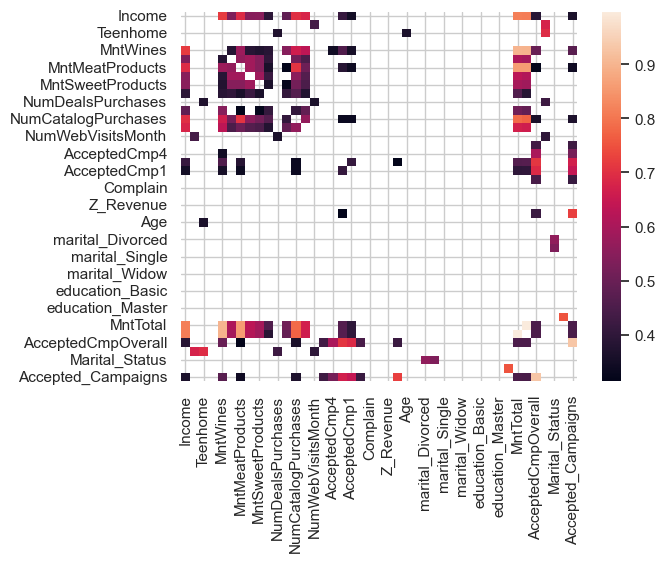

In [837]:
all_correlations = food1.corr(method = 'pearson')
all_correlations = all_correlations[(all_correlations > 0.3) & (all_correlations < 1 )]
sns.heatmap(all_correlations)

In [838]:
all_correlations['Accepted_Campaigns']

Income                  0.362983
Kidhome                      NaN
Teenhome                     NaN
Recency                      NaN
MntWines                0.469328
MntFruits                    NaN
MntMeatProducts         0.342145
MntFishProducts              NaN
MntSweetProducts             NaN
MntGoldProds                 NaN
NumDealsPurchases            NaN
NumWebPurchases              NaN
NumCatalogPurchases     0.369332
NumStorePurchases            NaN
NumWebVisitsMonth            NaN
AcceptedCmp3            0.428455
AcceptedCmp4            0.521582
AcceptedCmp5            0.667235
AcceptedCmp1            0.642555
AcceptedCmp2            0.417459
Complain                     NaN
Z_CostContact                NaN
Z_Revenue                    NaN
Response                0.723803
Age                          NaN
Customer_Days                NaN
marital_Divorced             NaN
marital_Married              NaN
marital_Single               NaN
marital_Together             NaN
marital_Wi

In [839]:
food.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Total_children,Marital_Status,Marital_Status_Str,Education_Status,Accepted_Campaigns
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,3,0,0,0,0,3,0,0,1529,1441,0,0,3,Single,3,1
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,3,0,0,0,0,3,0,0,21,15,0,2,3,Single,3,0
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,2,0,0,0,3,0,0,734,692,0,0,2,Together,3,0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,2,0,0,0,3,0,0,48,43,0,1,2,Together,3,0
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,4,0,0,0,0,0,0,0,5,407,392,0,1,4,Married,5,0


In [840]:
food['Age'].sort_values().head()

43      24
1150    24
2180    25
727     25
1824    25
Name: Age, dtype: int64

In [841]:
age_groups = [(23,30),(31,40),(41,50),(51,60),(61,70),(71,85)]


def assign_age_group(Age):
    for age_range in age_groups:
        if age_range[0] <= Age <= age_range[1]:
            return f"{age_range[0]} - {age_range[1]}"
    return ("Unknown") 

food['Age_Group'] =food['Age'].apply(assign_age_group)

In [842]:
food[['Age','Age_Group']].head()

,Age,Age_Group
0,63,61 - 70
1,66,61 - 70
2,55,51 - 60
3,36,31 - 40
4,39,31 - 40


<Axes: xlabel='Age_Group', ylabel='Accepted_Campaigns'>

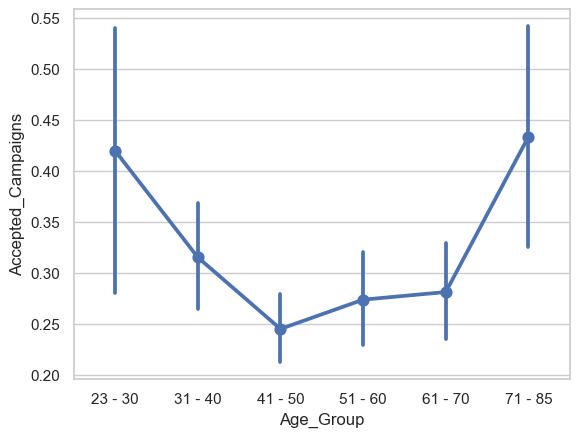

In [843]:
age_order = ['23 - 30','31 - 40','41 - 50','51 - 60','61 - 70','71 - 85']


sns.set(style="whitegrid")
sns.set_palette("deep")
warnings.simplefilter(action='ignore', category=FutureWarning)

sns.pointplot(data = food , x = 'Age_Group', y = 'Accepted_Campaigns', order = age_order )

In [844]:
food['Age_Group'].value_counts()

Age_Group
41 - 50    612
51 - 60    409
61 - 70    391
31 - 40    298
71 - 85     83
23 - 30     50
Name: count, dtype: int64

In [845]:
counts = food['Age_Group'].value_counts()

In [846]:
percentage = counts / food.shape[0]

In [847]:
percent_food = percentage.reset_index()

In [848]:
percent_food

,Age_Group,count
0,41 - 50,0.332067
1,51 - 60,0.221921
2,61 - 70,0.212154
3,31 - 40,0.161693
4,71 - 85,0.045035
5,23 - 30,0.027130


In [849]:
percent_food.columns = ['age_group' , 'percentage']

In [850]:
percent_food

,age_group,percentage
0,41 - 50,0.332067
1,51 - 60,0.221921
2,61 - 70,0.212154
3,31 - 40,0.161693
4,71 - 85,0.045035
5,23 - 30,0.027130


In [851]:
percent_food = percent_food.sort_values('age_group')

In [852]:
percent_food

,age_group,percentage
5,23 - 30,0.027130
3,31 - 40,0.161693
0,41 - 50,0.332067
1,51 - 60,0.221921
2,61 - 70,0.212154
4,71 - 85,0.045035


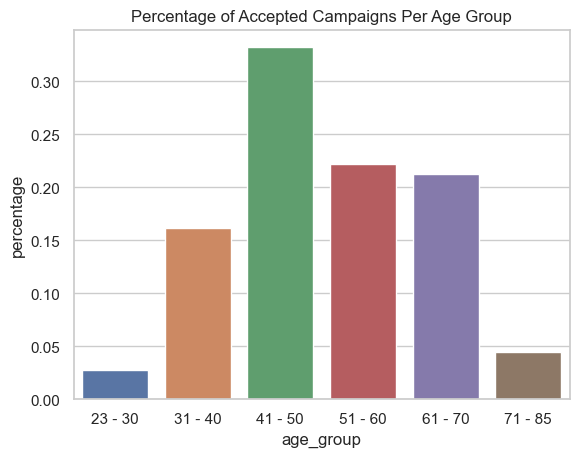

In [853]:
sns.barplot( x = 'age_group' , y = 'percentage' , data = percent_food , palette='deep')
plt.title('Percentage of Accepted Campaigns Per Age Group')
plt.show()

In [854]:
# Age Segmentation - core audience for Accepting Campaigns right now is 31 - 70

In [855]:
food.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Total_children,Marital_Status,Marital_Status_Str,Education_Status,Accepted_Campaigns,Age_Group
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,3,0,0,0,0,3,0,0,1529,1441,0,0,3,Single,3,1,61 - 70
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,3,0,0,0,0,3,0,0,21,15,0,2,3,Single,3,0,61 - 70
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,2,0,0,0,3,0,0,734,692,0,0,2,Together,3,0,51 - 60
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,2,0,0,0,3,0,0,48,43,0,1,2,Together,3,0,31 - 40
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,4,0,0,0,0,0,0,0,5,407,392,0,1,4,Married,5,0,31 - 40


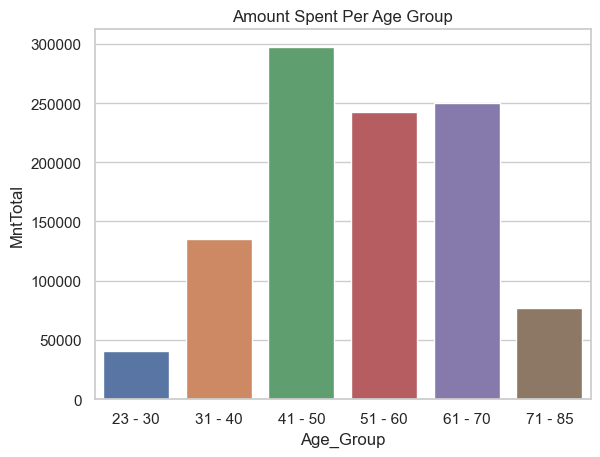

In [856]:
grouped_food = food.groupby('Age_Group')['MntTotal'].sum().reset_index()

sns.barplot( x = 'Age_Group' , y = 'MntTotal' , data = grouped_food , palette='deep')
plt.title('Amount Spent Per Age Group')
plt.show()

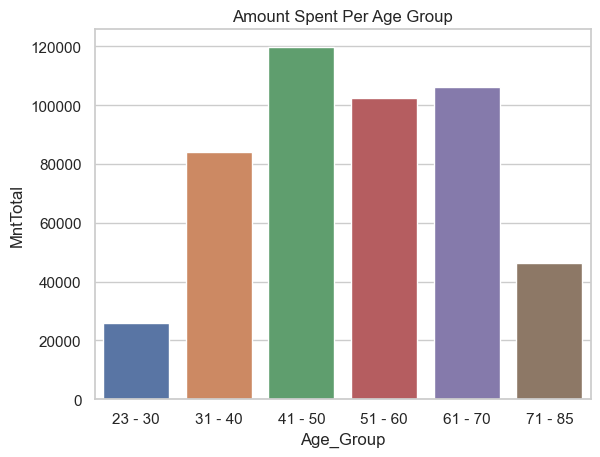

In [857]:
accpt_campaign = food[food['Accepted_Campaigns'] != 0]

grouped_food = accpt_campaign.groupby('Age_Group')['MntTotal'].sum().reset_index()

sns.barplot( x = 'Age_Group' , y = 'MntTotal' , data = grouped_food , palette='deep')
plt.title('Amount Spent Per Age Group')
plt.show()

In [858]:
# Age Segmentation - core audience for Accepting Campaigns right now is 31 - 70, 23-30, 71 and up accept at higher rates

In [859]:
food.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Total_children,Marital_Status,Marital_Status_Str,Education_Status,Accepted_Campaigns,Age_Group
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,3,0,0,0,0,3,0,0,1529,1441,0,0,3,Single,3,1,61 - 70
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,3,0,0,0,0,3,0,0,21,15,0,2,3,Single,3,0,61 - 70
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,2,0,0,0,3,0,0,734,692,0,0,2,Together,3,0,51 - 60
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,2,0,0,0,3,0,0,48,43,0,1,2,Together,3,0,31 - 40
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,4,0,0,0,0,0,0,0,5,407,392,0,1,4,Married,5,0,31 - 40


In [860]:
sum_food = pd.DataFrame(food[['NumWebPurchases','NumCatalogPurchases','NumStorePurchases']].sum(), columns = ['Sums'])

In [861]:
sum_food = sum_food.reset_index()

In [862]:
sum_food

,index,Sums
0,NumWebPurchases,7619
1,NumCatalogPurchases,4871
2,NumStorePurchases,10675


In [863]:
sum_food.rename(columns = {'index' :'Type_of_purchase' },inplace = True)

In [864]:
sum_food

,Type_of_purchase,Sums
0,NumWebPurchases,7619
1,NumCatalogPurchases,4871
2,NumStorePurchases,10675


<Axes: xlabel='Type_of_purchase', ylabel='Sums'>

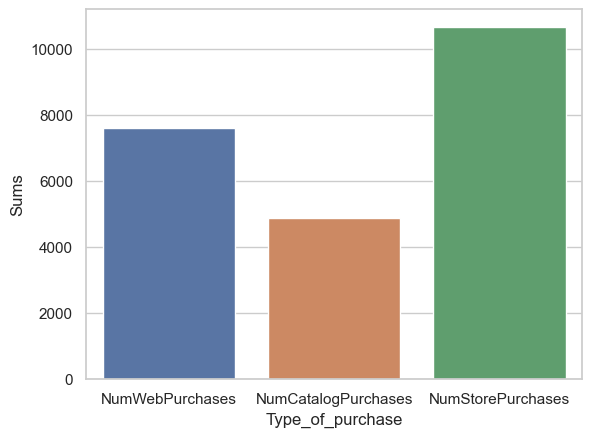

In [865]:
sns.barplot(x = 'Type_of_purchase' , y = 'Sums' , data = sum_food , palette='deep')

<Axes: xlabel='Type_of_purchase', ylabel='Sums'>

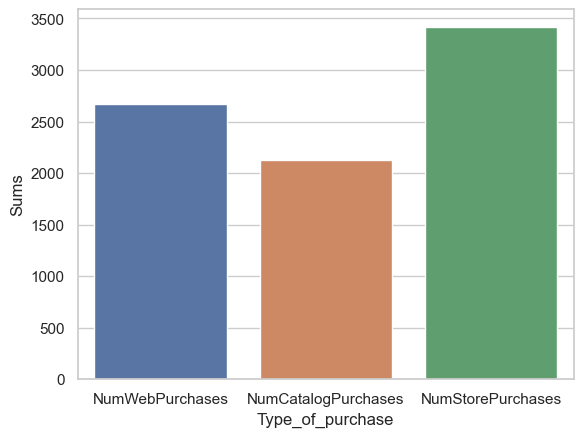

In [866]:
accpt_campaign = food[food['Accepted_Campaigns'] != 0]


sum_food = pd.DataFrame(accpt_campaign[['NumWebPurchases','NumCatalogPurchases','NumStorePurchases']].sum(), columns = ['Sums'])
sum_food = sum_food.reset_index()
sum_food.rename(columns = {'index' :'Type_of_purchase' },inplace = True)
sns.barplot(x = 'Type_of_purchase' , y = 'Sums' , data = sum_food , palette='deep')

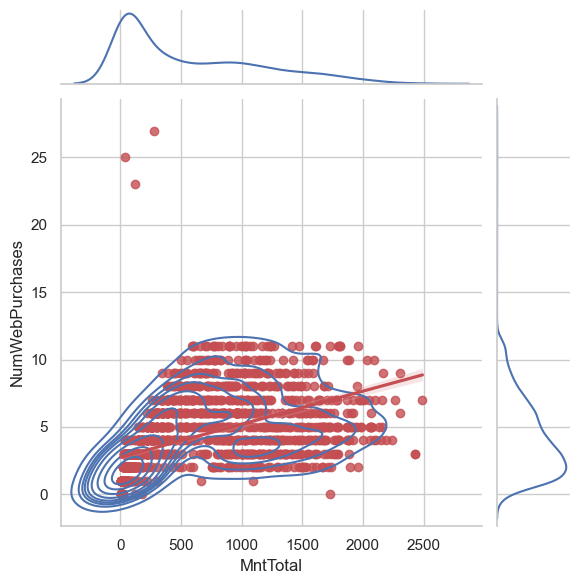

In [867]:
x = sns.jointplot(data = food , x = 'MntTotal' , y = 'NumWebPurchases', kind = 'kde')
x.plot_joint(sns.regplot , color = 'r')


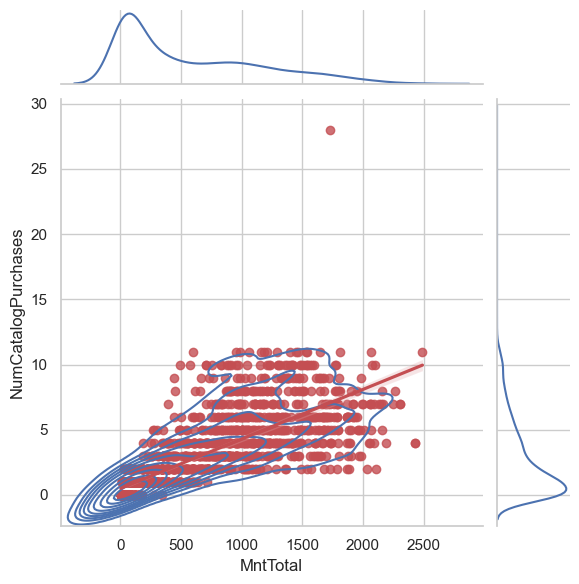

In [868]:
x = sns.jointplot(data = food , x = 'MntTotal' , y = 'NumCatalogPurchases' , kind = 'kde')
x.plot_joint(sns.regplot , color = 'r')

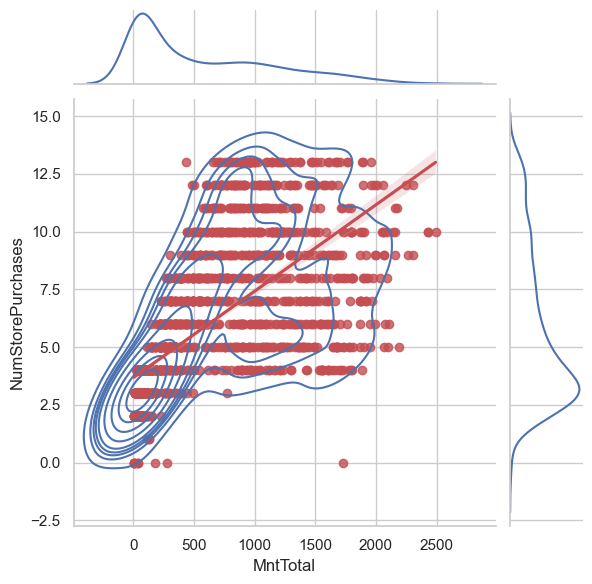

In [869]:
x = sns.jointplot(data = food , x ='MntTotal' , y = 'NumStorePurchases' , kind = 'kde')
x.plot_joint(sns.regplot , color = 'r')

In [870]:
# 2 Directions Boost up the higher percentage catalog customers. OR Focus on instore/Web because they have more traffic.

<Axes: xlabel='Total_children', ylabel='MntTotal'>

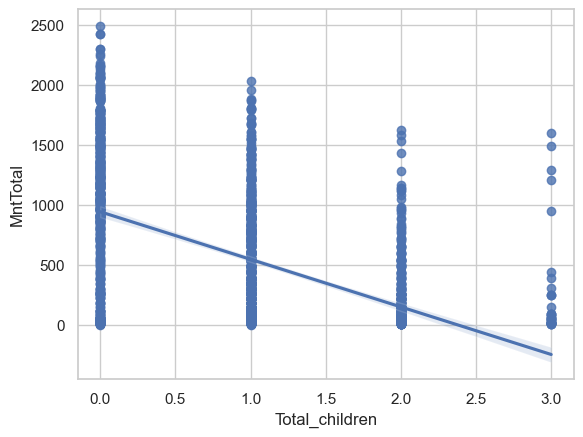

In [871]:
sns.regplot(x = 'Total_children', y = 'MntTotal', data = food )

<Axes: xlabel='Total_children', ylabel='Accepted_Campaigns'>

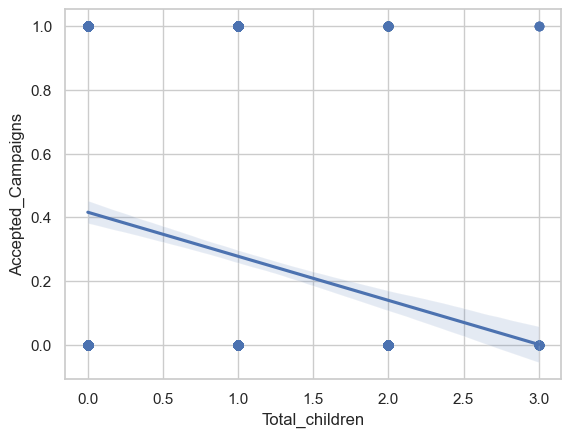

In [872]:
sns.regplot(x = 'Total_children', y = 'Accepted_Campaigns', data = food )

In [873]:
# Less Kids = More likely to accept campaigns

<Axes: xlabel='Education_Status', ylabel='Accepted_Campaigns'>

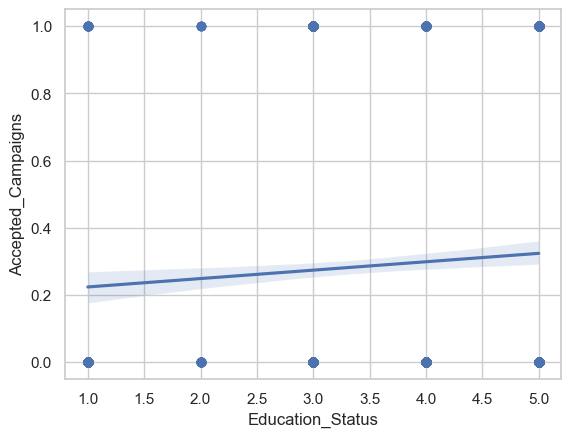

In [874]:
sns.regplot(x = 'Education_Status', y = 'Accepted_Campaigns', data = food )

<Axes: xlabel='Education_Status', ylabel='MntTotal'>

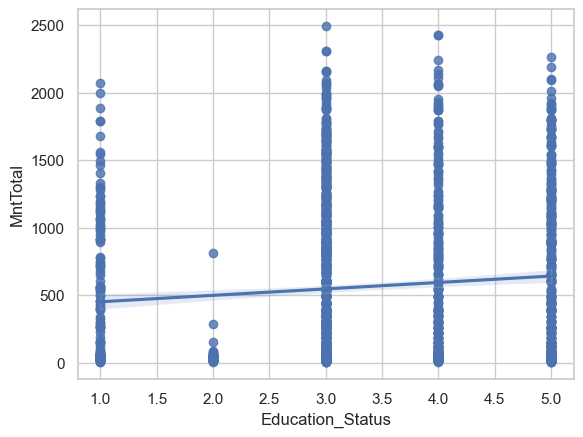

In [875]:
sns.regplot(x = 'Education_Status', y = 'MntTotal', data = food )

In [876]:
# Education isnt Really Significant in our segmentation

In [877]:
food.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Total_children,Marital_Status,Marital_Status_Str,Education_Status,Accepted_Campaigns,Age_Group
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,3,0,0,0,0,3,0,0,1529,1441,0,0,3,Single,3,1,61 - 70
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,3,0,0,0,0,3,0,0,21,15,0,2,3,Single,3,0,61 - 70
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,2,0,0,0,3,0,0,734,692,0,0,2,Together,3,0,51 - 60
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,2,0,0,0,3,0,0,48,43,0,1,2,Together,3,0,31 - 40
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,4,0,0,0,0,0,0,0,5,407,392,0,1,4,Married,5,0,31 - 40


<Axes: xlabel='Marital_Status_Str', ylabel='count'>

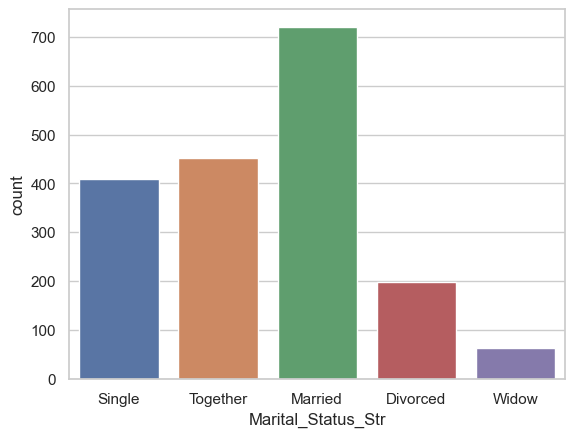

In [878]:
sns.countplot(x = 'Marital_Status_Str', data = food ,palette='deep' )

In [879]:
food.groupby('Marital_Status_Str')['MntTotal'].sum()

Marital_Status_Str
Divorced    111813
Married     397442
Single      231616
Together    254606
Widow        46014
Name: MntTotal, dtype: int64

In [880]:
accpt = food[food['Accepted_Campaigns'] != 0]



rel_food = accpt.groupby('Marital_Status_Str')['MntTotal'].sum().reset_index()

<Axes: xlabel='Marital_Status_Str', ylabel='MntTotal'>

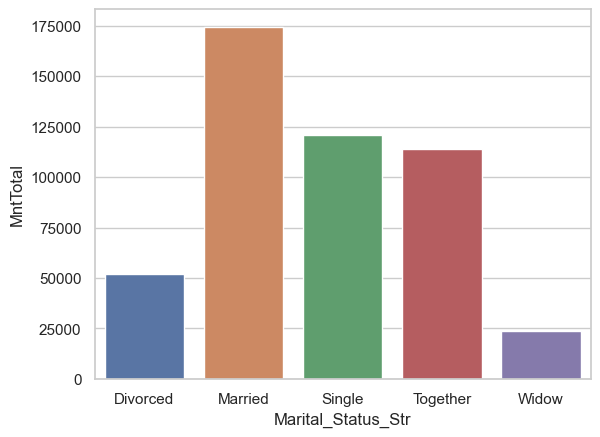

In [881]:
sns.barplot(x = 'Marital_Status_Str' ,y = 'MntTotal', data = rel_food , palette='deep' )

<Axes: xlabel='Marital_Status_Str', ylabel='MntTotal'>

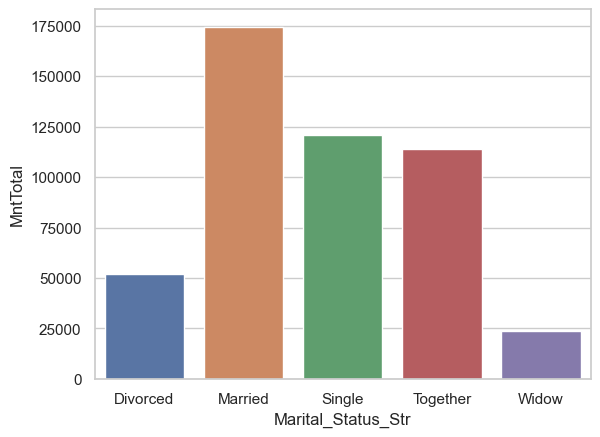

In [882]:
sns.barplot(x = 'Marital_Status_Str' ,y = 'MntTotal', data = rel_food , palette='deep' )

In [883]:
# Marriage - Marrried , Single , Together are spending a lot more money than widow and divorced. we should focus on this segment.

In [884]:
total = food['Marital_Status_Str'].value_counts()
accepted = food[food['Accepted_Campaigns'] == 1]['Marital_Status_Str'].value_counts()

In [885]:
percent_marital = accepted / total * 100

In [886]:
percent_food = percent_marital.reset_index()
percent_food.columns = ['Marital_Status', 'Percentage']

In [887]:
percent_food

,Marital_Status,Percentage
0,Divorced,28.643216
1,Married,26.111111
2,Single,32.762836
3,Together,26.607539
4,Widow,37.500000


<Axes: xlabel='Marital_Status', ylabel='Percentage'>

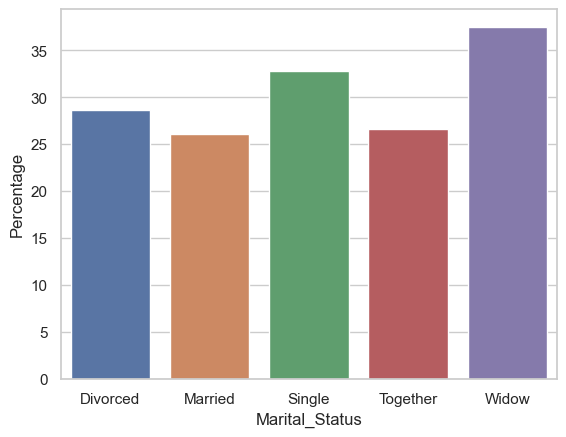

In [888]:
sns.barplot(x = 'Marital_Status' , y = 'Percentage', data = percent_food , palette='deep')

# Overall Findings
### 1. Age - 30-40 were spending more money, But less likely to accept campaigns. Higher volume here though.
### 2. Catalog were more likely to accept campaigns, But in person spends more . Recommend a split between all.
- 40% catalog , 30% store , 30% web.
### 3. Focus on people with no kids OR (Less kids).
### 4 .Education - No impact - Dont Target any Group.
### 5 . Marital_Status - Doesn't Play Big Part.

## Money Making
1. Middle Aged People , High Earners , With no kids . Target on different platforms with split Above.

## New Users To Spend Money
2. Focus on 21 - 30 , 70 and up - Who statistically Accepted Campaigns at Higher Rates.